In [66]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.ndimage import convolve, correlate
from PIL import Image

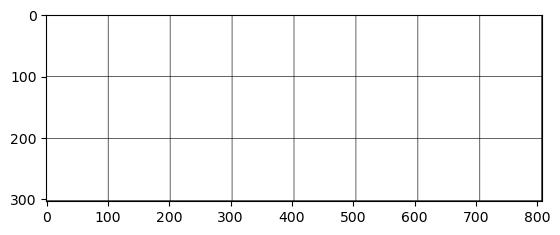

In [53]:
def generate_grid(k, t, m, n, v, w):
    """
    Rows that are lines = 
    """

    # Compute dimensions of grid
    total_width = (n+1)*t + n*k
    total_height = (m+1)*t + m*k
    
    # Prefill array with correct dimensions
    img = v*np.ones((total_height, total_width))
    
    # Variables to keep track of where we are
    row_lines_drawn, col_lines_drawn, grid_cells_drawn = 0, 0, 0
        
    # Check if row is just grid line
    for i in range(img.shape[0]):
        
        # Check if it's time to draw a grid cell
        if row_lines_drawn < t:
            row_lines_drawn += 1
            continue
            
        # Check if col is grid line or cell
        row_lines_drawn = 0
        for j in range(img.shape[1]):
            if row_lines_drawn < t:
                row_lines_drawn += 1
                continue
            
            img[i,j] = w
            grid_cells_drawn += 1
            
            # Check if need to move on to next grid cell
            if grid_cells_drawn == k:
                row_lines_drawn, grid_cells_drawn = 0, 0
         
        col_lines_drawn += 1
        if col_lines_drawn == k:
            col_lines_drawn, row_lines_drawn = 0, 0

    plt.imshow(img)
    plt.gray()
    plt.show()
    
generate_grid(k=100, t=1, m=3, n=8, v=0, w=255)

In [63]:
F = [[5,2,0,1,8],
     [9,1,4,3,2],
     [3,4,0,5,1],
     [3,1,2,2,1]]

H = [[0,1,0],
     [1,4,1],
     [0,1,0]]

convolve(F, convolve(H, convolve(H, H, mode='constant'), mode='constant'), mode='constant')

array([[1200,  872,  488,  872, 1136],
       [1656, 1368,  960, 1224, 1040],
       [1280, 1160, 1008, 1112,  680],
       [ 656,  688,  608,  696,  400]])

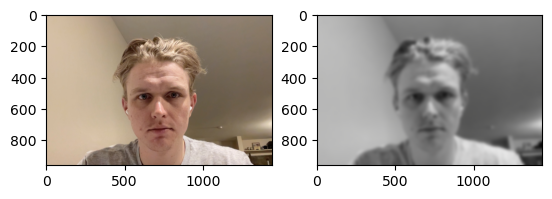

In [78]:
from scipy.ndimage import gaussian_filter

with Image.open('selfie.jpg') as img:
    fig = plt.figure()
    ax1 = fig.add_subplot(121)  # left side
    ax2 = fig.add_subplot(122)  # right side
    result = gaussian_filter(img, sigma=9)
    ax1.imshow(img)
    ax2.imshow(result)
    plt.show()